264
(264, 264)


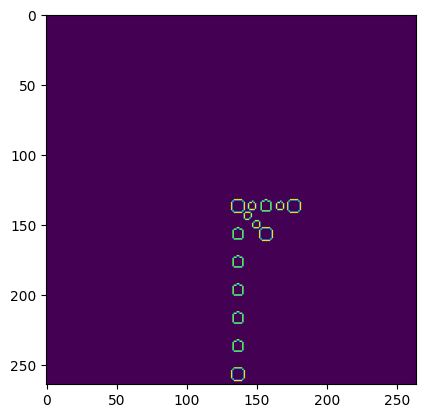

center_image1 [[136.5        136.5       ]
 [136.41666667 156.5       ]
 [136.5        176.5       ]
 [136.4375     146.5       ]
 [136.4375     166.5       ]
 [143.33333333 143.33333333]
 [149.66666667 149.66666667]
 [156.41666667 136.5       ]
 [156.5        156.5       ]
 [176.41666667 136.5       ]
 [196.41666667 136.5       ]
 [216.41666667 136.5       ]
 [236.41666667 136.5       ]
 [256.5        136.5       ]]
center_image2 [[136.5        136.5       ]
 [136.45833333 156.5       ]
 [136.5        176.5       ]
 [136.375      146.5       ]
 [136.375      166.5       ]
 [143.33333333 143.33333333]
 [146.375      136.5       ]
 [149.66666667 149.66666667]
 [156.46428571 156.5       ]
 [156.45833333 136.5       ]
 [166.375      136.5       ]
 [176.45833333 136.5       ]
 [186.375      136.5       ]
 [196.45833333 136.5       ]
 [206.375      136.5       ]
 [216.5        136.5       ]]
264
(264, 264)


In [41]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

# Load the data
binary_image1 = np.load('CerclesI1.npy')
print(binary_image1.shape[0])
binary_image2 = np.load('CerclesI2.npy')
print(binary_image2.shape)
center_image1= np.load('CerclesC1.npy')
plt.imshow(binary_image1)
plt.show()
print("center_image1",center_image1)
center_image2= np.load('CerclesC2.npy')
print("center_image2",center_image2)
# Load the data
CerclesSegmented1 = np.load('CerclesSegmented1.npy')
print(CerclesSegmented1.shape[0])
CerclesSegmented2 = np.load('CerclesSegmented2.npy')
print(CerclesSegmented2.shape)


In [42]:
img = cv.imread("CerclesC1.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [43]:
# Object points in 3D space
objp = np.array([
    [0, 0, 0],
    [0.7,0.7,0],
    [0, 1, 0],
    [1.31,1.31,0],   
    [0, 2, 0],
    [2,2,0],
    [0, 3, 0],
    [0, 4, 0],
    
    


], dtype=np.float32)
print(objp)
# Image points in 2D space for image 1
import numpy as np

# Assuming `center_image1` and `center_image2` are arrays or lists containing coordinates

# Image points in 2D space for image 1
imgpoints1 = np.array([
    [center_image1[0][0], center_image1[0][1]],
    [center_image1[5][0], center_image1[5][1]],
    [center_image1[3][0], center_image1[3][1]],
    [center_image1[6][0], center_image1[6][1]],
    [center_image1[1][0], center_image1[1][1]],
    [center_image1[8][0], center_image1[8][1]],
    [center_image1[4][0], center_image1[4][1]],
    [center_image1[2][0], center_image1[2][1]],
   
    

], dtype=np.float32)
imgpoints1 = np.reshape(imgpoints1, (-1,1,2))
# Image points in 2D space for image 2
imgpoints2 = np.array([
    [center_image2[0][0], center_image2[0][1]],
    [center_image2[5][0], center_image2[5][1]],
    [center_image2[3][0], center_image2[3][1]],
    [center_image2[7][0], center_image2[7][1]],
    [center_image2[1][0], center_image2[1][1]],
    [center_image2[8][0], center_image2[8][1]],
    
    [center_image2[4][0], center_image2[4][1]],
    [center_image2[2][0], center_image2[2][1]],
    

], dtype=np.float32)
imgpoints2 = np.reshape(imgpoints2, (-1,1,2))
print(imgpoints2)

[[0.   0.   0.  ]
 [0.7  0.7  0.  ]
 [0.   1.   0.  ]
 [1.31 1.31 0.  ]
 [0.   2.   0.  ]
 [2.   2.   0.  ]
 [0.   3.   0.  ]
 [0.   4.   0.  ]]
[[[136.5     136.5    ]]

 [[143.33333 143.33333]]

 [[136.375   146.5    ]]

 [[149.66667 149.66667]]

 [[136.45833 156.5    ]]

 [[156.46428 156.5    ]]

 [[136.375   166.5    ]]

 [[136.5     176.5    ]]]


In [44]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

image_size = (binary_image1.shape[0], binary_image1.shape[1])
print(image_size)
# Here, you need to specify your initial guess for the intrinsic matrix
initial_intrinsic_matrix = np.array([[7.5, 0, len(gray)/2],
                                     [0, 7.5, len(gray)/2],
                                     [0, 0, 1]])
for imgp in [imgpoints1,imgpoints2]:
    objpoints.append(objp)
    imgpoints.append(imgp)

    ret,mtx,dist,rvecs,tvecs = cv.calibrateCamera(objpoints,imgpoints, gray.shape[::-1], initial_intrinsic_matrix,None,None, flags=cv.CALIB_USE_INTRINSIC_GUESS)

(264, 264)


In [45]:
def mark_circle_centers(binary_image):
    list_countour=[]
    
    for i in range(binary_image.shape[0]):  # for rows
        for j in range(binary_image.shape[1]):  # for columns
            if binary_image[i, j] == 1:
             
                list_countour.append((i,j))
    return(list_countour)
countour_image_1=mark_circle_centers(binary_image1)
countour_image_2=mark_circle_centers(binary_image2)

print(countour_image_1)
print(len(countour_image_1))

print(countour_image_2)
print(len(countour_image_2))
# Convertir les listes de tuples en ndarray
imgpoints_contour_1 = np.array(countour_image_1, dtype='float32')
imgpoints_contour_2 = np.array(countour_image_2, dtype='float32')


[(132, 134), (132, 135), (132, 136), (132, 137), (132, 138), (132, 139), (132, 156), (132, 157), (132, 174), (132, 175), (132, 176), (132, 177), (132, 178), (132, 179), (133, 133), (133, 140), (133, 147), (133, 154), (133, 155), (133, 158), (133, 159), (133, 167), (133, 173), (133, 180), (134, 132), (134, 141), (134, 145), (134, 146), (134, 148), (134, 153), (134, 160), (134, 165), (134, 166), (134, 168), (134, 172), (134, 181), (135, 132), (135, 141), (135, 144), (135, 149), (135, 153), (135, 160), (135, 164), (135, 169), (135, 172), (135, 181), (136, 132), (136, 141), (136, 144), (136, 149), (136, 153), (136, 160), (136, 164), (136, 169), (136, 172), (136, 181), (137, 132), (137, 141), (137, 144), (137, 149), (137, 153), (137, 160), (137, 164), (137, 169), (137, 172), (137, 181), (138, 132), (138, 141), (138, 144), (138, 149), (138, 153), (138, 160), (138, 164), (138, 169), (138, 172), (138, 181), (139, 132), (139, 141), (139, 145), (139, 146), (139, 147), (139, 148), (139, 153), (13

In [46]:
import numpy as np
import cv2 as cv

def back_project(mtx, rvecs, tvecs, points2D):
    # Ensure that points2D is in the correct shape (N, 1, 2) or (N, 2)
    points2D = np.array(points2D, dtype='float32').reshape(-1, 1, 2)
    
    # Convert 2D points to homogeneous coordinates (N, 1, 3)
    points2D_hom = cv.convertPointsToHomogeneous(points2D).reshape(-1, 3)  # Reshape to (N, 3)

    # Inverse camera matrix for back-projection
    inv_cam_mat = np.linalg.inv(mtx)

    # Transform 2D points into 3D using the inverse camera matrix
    points3D = np.dot(inv_cam_mat, points2D_hom.T)  # Now 3xN

    # Apply the inverse rotation
    rot_inv = np.linalg.inv(cv.Rodrigues(rvecs)[0])
    trans_inv = -np.dot(rot_inv, tvecs)

    # Add the inverse translation
    points3D = np.dot(rot_inv, points3D) + trans_inv[:, np.newaxis]

    return points3D.T  # Transpose to return in format Nx3


# Example usage
# Make sure you have mtx, rvecs, tvecs defined, and points2D prepared
# points2D should be a list or an array of points (N, 1, 2) or (N, 2)
# Assuming you have imgpoints1 correctly loaded and shaped for input
points3D = back_project(mtx, rvecs[0], tvecs[0], imgpoints_contour_1)  # Use correctly prepared points here
print(points3D)
# Exemple d'utilisation pour la deuxième caméra
points3D_second = back_project(mtx, rvecs[1], tvecs[1], imgpoints_contour_2)




[[[ -4.05322834  -4.03653328 -15.13702368]
  [ -3.81382783  -3.79713277 -14.89762317]
  [ 11.33543911  11.35213417   0.25164377]]

 [[ -4.05335532  -4.03666027 -15.13715066]
  [ -3.68049455  -3.66379949 -14.76428989]
  [ 11.33543462  11.35212968   0.25163928]]

 [[ -4.05348231  -4.03678725 -15.13727765]
  [ -3.54716127  -3.53046621 -14.63095661]
  [ 11.33543014  11.35212519   0.2516348 ]]

 ...

 [[ 13.14638237  13.16307743   2.06258703]
  [ -3.397447    -3.38075194 -14.48124234]
  [ 11.33329591  11.34999096   0.24950057]]

 [[ 13.14625539  13.16295044   2.06246005]
  [ -3.26411372  -3.24741866 -14.34790906]
  [ 11.33329142  11.34998648   0.24949608]]

 [[ 13.1461284   13.16282346   2.06233306]
  [ -3.13078044  -3.11408538 -14.21457577]
  [ 11.33328693  11.34998199   0.24949159]]]


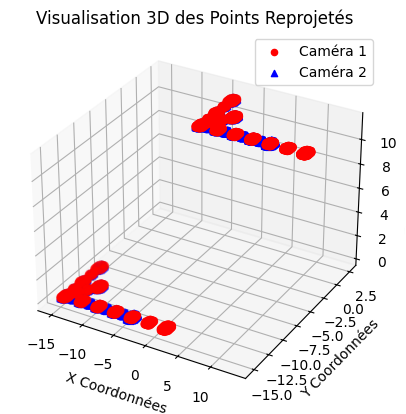

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Créer une figure pour le tracé 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Supposons que points3D soit votre array de points reprojétés en 3D
# points3D est un array de forme (N, 3) où chaque ligne est (x, y, z)
x_vals = points3D[:, 0]
y_vals = points3D[:, 1]
z_vals = points3D[:, 2]

# Ajouter les points de la première caméra
ax.scatter(x_vals, y_vals, z_vals, c='r', marker='o', label='Caméra 1')

# Ajouter les points de la deuxième caméra
x_vals_second = points3D_second[:, 0]
y_vals_second = points3D_second[:, 1]
z_vals_second = points3D_second[:, 2]
ax.scatter(x_vals_second, y_vals_second, z_vals_second, c='b', marker='^', label='Caméra 2')

# Nommer les axes
ax.set_xlabel('X Coordonnées')
ax.set_ylabel('Y Coordonnées')
ax.set_zlabel('Z Coordonnées')

# Titre du graphique
ax.set_title('Visualisation 3D des Points Reprojetés')

# Ajouter une légende
ax.legend()

# Afficher le graphique
plt.show()
